In [1]:
import copy

import matplotlib.pyplot as plt
import numpy as np
import scanpy as sc
import pandas as pd
from algorithms import *
from data_gen import *
from spectrum_gen import *
from visualizations import *
from analysis import *
# Press ⌃R to execute it or replace it with your code.
# Press Double ⇧ to search everywhere for classes, files, tool windows, actions, and settings.
import rpy2.robjects as ro
import rpy2.robjects.numpy2ri
#read data
adata_neg , adata_pos = read_chlamydomonas_files(n_obs=3000) #We limit each dataset for 3000 samples because ccRemover did not converge for larger datasets



/Users/jonathankarin/.conda/envs/spctral_jan/lib/python3.9/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


silhoutte score before : 0.08819773
davies_bouldin_score: 3.1180831844415478
calinski_harabasz_score: 600.8027345269905


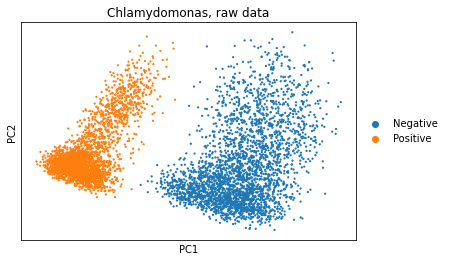

In [2]:
#standard pre-processing
sc.pp.filter_cells(adata_neg, min_genes=100)
sc.pp.filter_cells(adata_pos, min_genes=100)
sc.pp.normalize_per_cell(adata_neg, counts_per_cell_after=1e4)
sc.pp.log1p(adata_neg)
sc.pp.normalize_per_cell(adata_pos, counts_per_cell_after=1e4)
sc.pp.log1p(adata_pos)

adata_unit = adata_neg.concatenate(adata_pos)
bdata_unit = copy.deepcopy(adata_unit.copy())
filter_result = sc.pp.filter_genes_dispersion(
        bdata_unit.X,  n_top_genes=7000, log=False
    )
adata_unit._inplace_subset_var(filter_result.gene_subset)
adata_neg._inplace_subset_var(filter_result.gene_subset)  # filter genes
adata_pos._inplace_subset_var(filter_result.gene_subset)  # filter genes
bdata_unit._inplace_subset_var(filter_result.gene_subset)
#plot_diurnal_cycle_by_phase(bdata_unit, title="Merged , raw data")
labels = adata_unit.obs["FE"]
print("silhoutte score before : " +str(silhouette_score(adata_unit.X,labels)))
print("davies_bouldin_score: "+str(davies_bouldin_score(adata_unit.X,labels)))
print("calinski_harabasz_score: "+str(calinski_harabasz_score(adata_unit.X,labels)))
sc.tl.pca(bdata_unit)
sc.pl.pca(bdata_unit,color="FE", title="Chlamydomonas, raw data")


In [4]:
E_pos , E_rec_pos = reconstruction_cyclic(np.array(adata_pos.X).astype('float64'), iterNum=75,batch_size=5000 ) # 25,4000,0.1
E_neg , E_rec_neg = reconstruction_cyclic(np.array(adata_neg.X).astype('float64'), iterNum=75,batch_size=5000 ) # 25,4000,0.1
order_list_pos = E_to_range(E_rec_pos)
adata_pos = adata_pos[order_list_pos,:]
order_list_neg = E_to_range(E_rec_neg)
adata_neg = adata_neg[order_list_neg,:]
adata_neg.write(filename="adata_neg_reordered.h5ad")
adata_pos.write(filename="adata_pos_reordered.h5ad")


Iteration number: 
0
 function value= 
8.834679573244411e-21
Iteration number: 
25
 function value= 
15935.691511710695
Iteration number: 
50
 function value= 
14749.744268345003
Iteration number: 
0
 function value= 
9.776067568616138e-21
Iteration number: 
25
 function value= 
39298.87565628778
Iteration number: 
50
 function value= 
39246.75898336427


/Users/jonathankarin/.conda/envs/spctral_jan/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


In [5]:
bdata_pos = copy.deepcopy(adata_pos.copy())
bdata_neg = copy.deepcopy(adata_neg.copy())

cdata_pos = copy.deepcopy(adata_pos.copy())
cdata_neg = copy.deepcopy(adata_neg.copy())

#plot_diurnal_cycle_by_phase(adata_pos, title="Ordered , FE+ ")
#plot_diurnal_cycle_by_phase(adata_neg, title="Ordered , FE- ")


Iteration number: 
1
function value: 
34725.11498631755
Iteration number: 
26
function value: 
178291.664623723
Iteration number: 
51
function value: 
181211.4130930536
Iteration number: 
76
function value: 
182132.66872157995
Iteration number: 
1
function value: 
10847.305198095415
Iteration number: 
26
function value: 
135600.39375815948
Iteration number: 
51
function value: 
139192.60620988754
Iteration number: 
76
function value: 
140209.2512266098


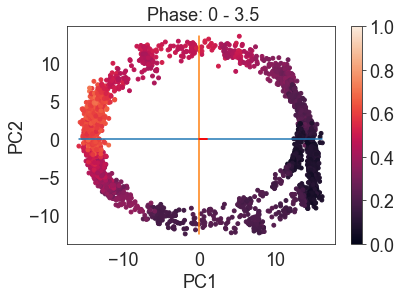

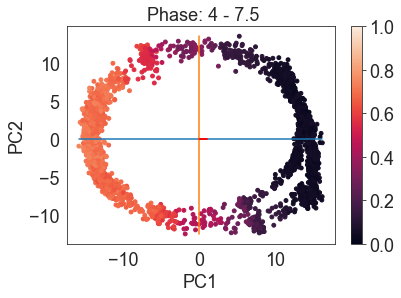

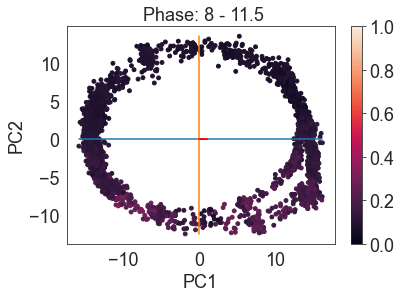

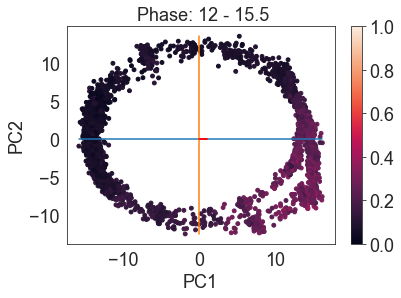

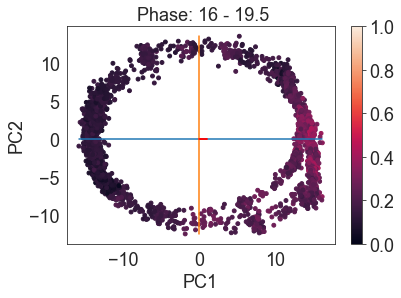

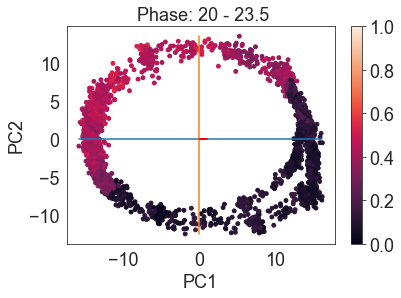

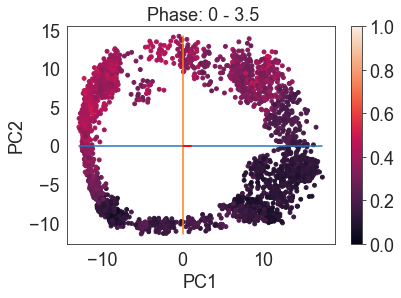

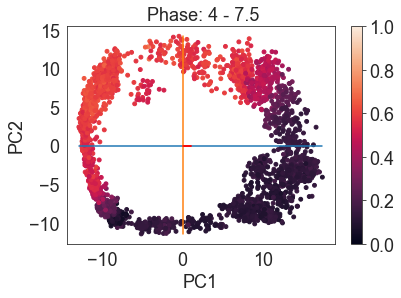

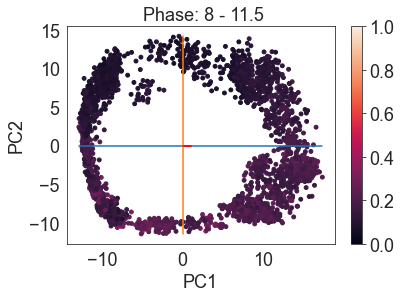

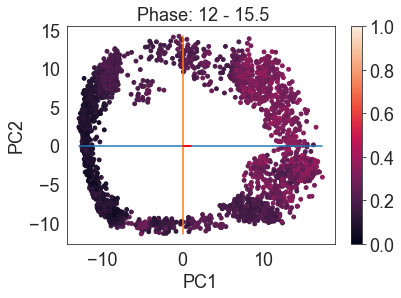

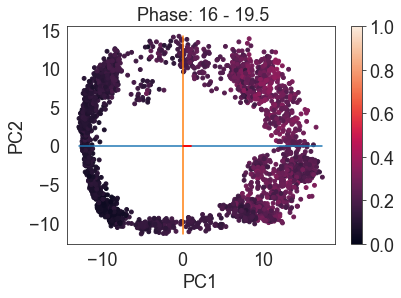

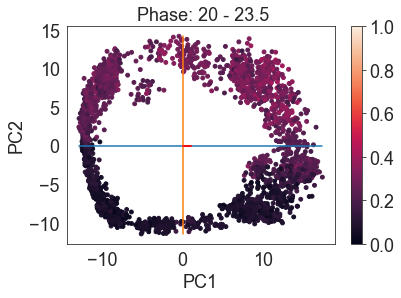

In [6]:
#Signal Enhancement

F_en_neg =enhancement_cyclic(bdata_neg.X, regu=0.01 ,iterNum=100)
F_en_pos =enhancement_cyclic(bdata_pos.X, regu=0.01 ,iterNum=100)
bdata_neg.X = bdata_neg.X * F_en_neg
bdata_pos.X = bdata_pos.X * F_en_pos

plot_diurnal_cycle_by_phase(bdata_pos, title="Enhanced , FE+ ")
plot_diurnal_cycle_by_phase(bdata_neg, title="Enhanced , FE- ")


starting filtering
25
th Iteration    Loss :: 
1850.0230190664415
50
th Iteration    Loss :: 
876.0425548306404
75
th Iteration    Loss :: 
569.0170513636011
100
th Iteration    Loss :: 
436.28134822587174
125
th Iteration    Loss :: 
351.1854541711175
150
th Iteration    Loss :: 
297.64539481105066
175
th Iteration    Loss :: 
256.2824382258789
200
th Iteration    Loss :: 
224.95716188147873
225
th Iteration    Loss :: 
204.47344422424382
250
th Iteration    Loss :: 
187.95264100910657
275
th Iteration    Loss :: 
171.47287609695945
300
th Iteration    Loss :: 
157.73376783330707
starting filtering
25
th Iteration    Loss :: 
699.7179980078697
50
th Iteration    Loss :: 
345.3506087912517
75
th Iteration    Loss :: 
245.93485690379887
100
th Iteration    Loss :: 
188.97371109609475
125
th Iteration    Loss :: 
160.14777874616888
150
th Iteration    Loss :: 
138.8524112477425
175
th Iteration    Loss :: 
120.48893732178485
200
th Iteration    Loss :: 
107.60989152268027
225
th Iteratio

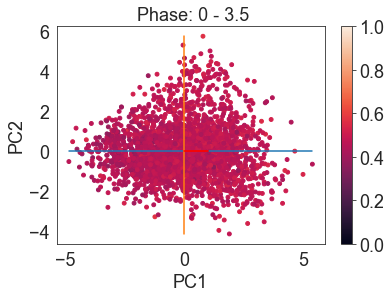

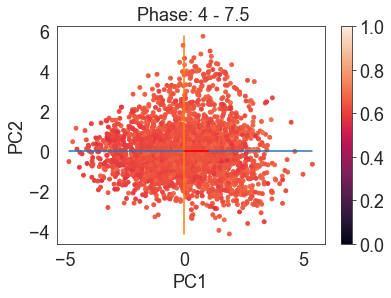

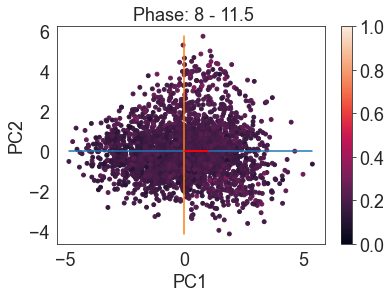

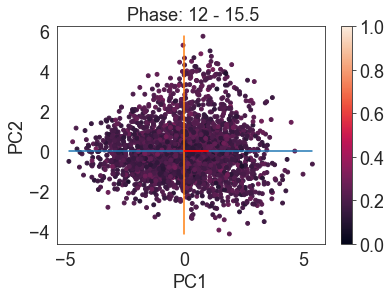

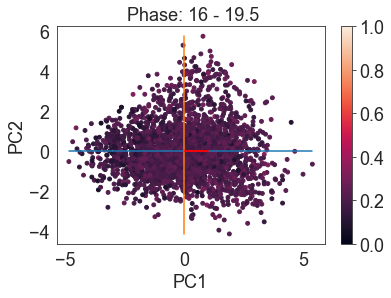

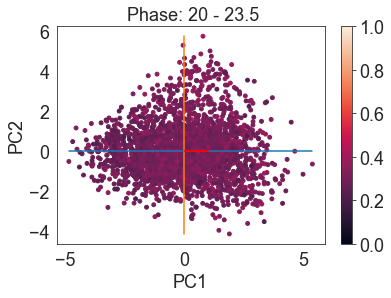

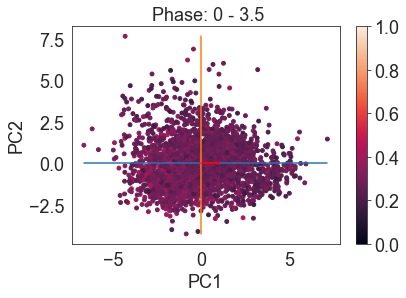

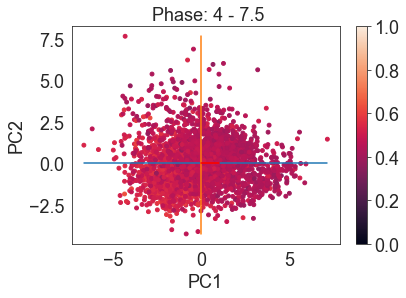

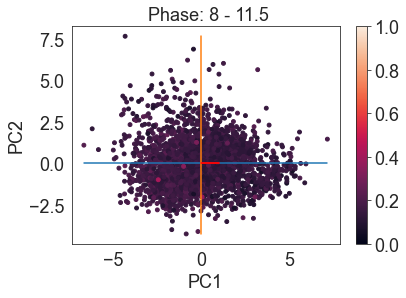

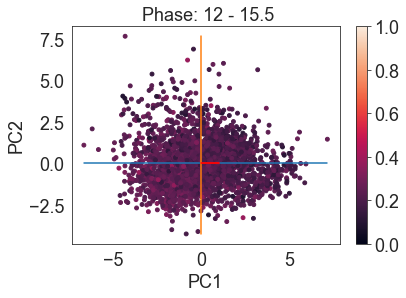

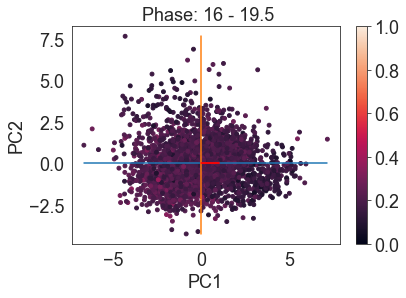

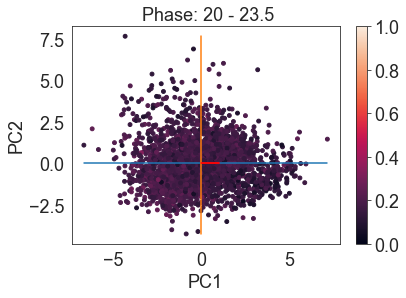

In [7]:
#Signal filtering

F_neg =filtering_cyclic(adata_neg.X, regu=0 ,iterNum=300)
F_pos =filtering_cyclic(adata_pos.X, regu=0 ,iterNum=300)

cdata_neg.X = cdata_neg.X * F_neg
cdata_pos.X = cdata_pos.X * F_pos

plot_diurnal_cycle_by_phase(cdata_pos, title="Filtered , FE+ ")
plot_diurnal_cycle_by_phase(cdata_neg, title="Filtered , FE- ")


/Users/jonathankarin/.conda/envs/spctral_jan/lib/python3.9/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


silhoutte score  : 0.1368986213913826
davies_bouldin_score: 2.413965581658083
calinski_harabasz_score: 1007.9721467052204


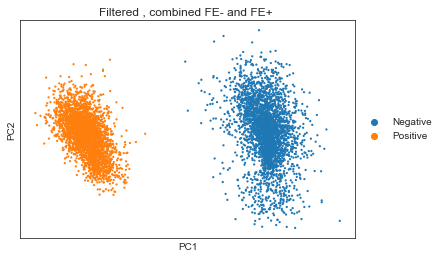

In [8]:
cdata_unit = cdata_neg.concatenate(cdata_pos)
labels_str = cdata_unit.obs["FE"]
print("silhoutte score  : " +str(silhouette_score(cdata_unit.X,labels_str)))
print("davies_bouldin_score: "+str(davies_bouldin_score(cdata_unit.X,labels_str)))
print("calinski_harabasz_score: "+str(calinski_harabasz_score(cdata_unit.X,labels_str)))
sc.tl.pca(cdata_unit)
sc.pl.pca(cdata_unit,color="FE" , title="Filtered , combined FE- and FE+ ")


/Users/jonathankarin/.conda/envs/spctral_jan/lib/python3.9/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


silhoutte score  : 0.026056674895133247
davies_bouldin_score: 6.749285443170331
calinski_harabasz_score: 129.81318193497896


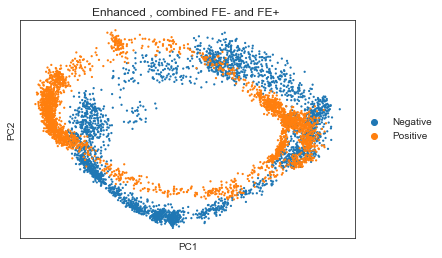

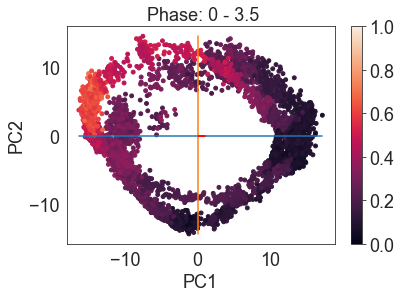

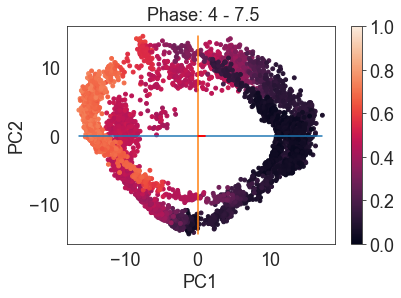

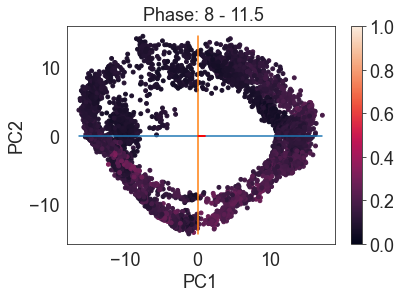

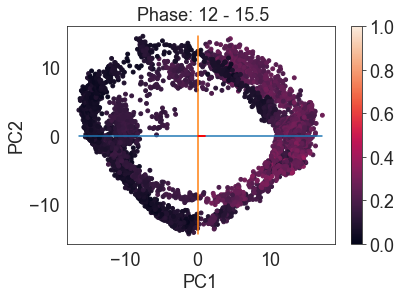

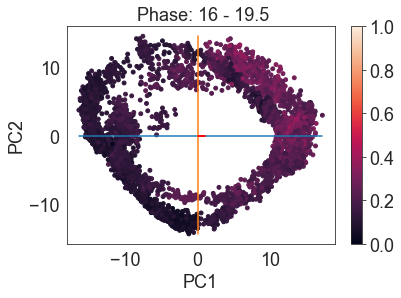

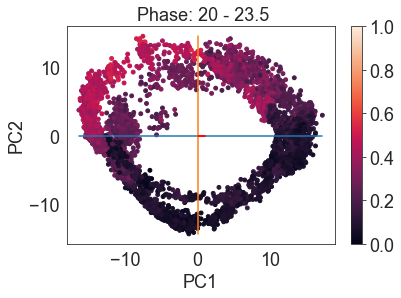

In [9]:
bdata_unit = bdata_neg.concatenate(bdata_pos)
labels_str = bdata_unit.obs["FE"]
print("silhoutte score  : " +str(silhouette_score(bdata_unit.X,labels_str)))
print("davies_bouldin_score: "+str(davies_bouldin_score(bdata_unit.X,labels_str)))
print("calinski_harabasz_score: "+str(calinski_harabasz_score(bdata_unit.X,labels_str)))
sc.tl.pca(bdata_unit)
sc.pl.pca(bdata_unit,color="FE" , title="Enhanced , combined FE- and FE+ ")
plot_diurnal_cycle_by_phase(bdata_unit, title="Enhanced , combined FE- and FE+ ")
